# Maps Showing Daily Average Rainfall for a 3 Month Period (April, May, and June)

In [1]:
#Import packages
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cftime
import pandas as pd

In [2]:
#Identify path
path = '/Users/emmabenedict/Desktop/Code/'

In [3]:
#Load .nc file for E3SM.HR and E3SM.MMF
#HR
esm_hr = xr.open_dataset(path + 'E3SM.HR.ne120pg2.0001-0010.US.2x2.5.hourly.PRECC.PRECL.nc')
#MMF
esm_mmf = xr.open_dataset(path + 'E3SM.MMF.ne30pg2_CRM64x2000.0001-0010.US.2x2.5.hourly.PRECC.PRECL.nc')

In [4]:
#Load .nc file for CPC
cpc_nc = xr.open_dataset(path + 'CPC.1958-1997.US.2x2.5.hourly.precip.nc')
#Load .nc file for IMERG
imerg_nc = xr.open_dataset(path + 'IMERG.2001-2020.US.2x2.5.half_hourly.precipitationCal.nc')

In [5]:
#Load variables
#HR
lat_hr = esm_hr.lat
lon_hr = esm_hr.lon
time_hr = esm_hr.time
precc_hr = esm_hr.PRECC
precl_hr = esm_hr.PRECL
precip_hr = precc_hr + precl_hr
area_hr = esm_hr.area
#MMF
lat_mmf = esm_mmf.lat
lon_mmf = esm_mmf.lon
time_mmf = esm_mmf.time
precc_mmf = esm_mmf.PRECC
precl_mmf = esm_mmf.PRECL
precip_mmf = precc_mmf + precl_mmf
area_mmf = esm_mmf.area

In [6]:
#Load variables
#CPC
lat_cpc = cpc_nc.lat
lon_cpc = cpc_nc.lon
time_cpc = cpc_nc.time
precip_cpc = cpc_nc.precip
#MMF
lat_img = imerg_nc.lat
lon_img = imerg_nc.lon
time_img = imerg_nc.time
precip_img = imerg_nc.precipitationCal

In [29]:
#Adjust to get daily rainfall
#HR
precip_hr_daily = precip_hr*1000*60*60*24
#MMF
precip_mmf_daily = precip_mmf*1000*60*60*24
#CPC
precip_cpc_daily = precip_cpc*25.4*24
#MMF
precip_img_daily = precip_img*24

In [7]:
#Specific locations: Athens and Seattle
hr_athens = precip_hr.sel(lon=276.64,lat=33.95,method="nearest")*1000*60*60*24
hr_seattle = precip_hr.sel(lon=237.67,lat=47.60,method="nearest")*1000*60*60*24
mmf_athens = precip_mmf.sel(lon=276.64,lat=33.95,method="nearest")*1000*60*60*24
mmf_seattle = precip_mmf.sel(lon=237.67,lat=47.60,method="nearest")*1000*60*60*24
#Obs
cpc_athens = precip_cpc.sel(lon=276.64,lat=33.95,method="nearest")*25.4*24
cpc_seattle = precip_cpc.sel(lon=237.67,lat=47.60,method="nearest")*25.4*24
img_athens = precip_img.sel(lon=276.64,lat=33.95,method="nearest")*24
img_seattle = precip_img.sel(lon=237.67,lat=47.60,method="nearest")*24

In [40]:
#Use loop to calculate a three month average for HR -- April, May, and June (amj)
months = [4,5,6]
amj_hr_ts = []
for year in range(1, 10):  # Adjust based on your data's year range
    for month in months:
        # Filter data for the specific year and month
        monthly_data = hr_athens.sel(time=(hr_athens['time.year'] == year) & (hr_athens['time.month'] == month))
        amj_hr_ts.append(monthly_data)

combine_amj_hr_ts = xr.concat(amj_hr_ts, dim='time')

In [30]:
#Use loop to calculate a three month average for HR -- April, May, and June (amj)
months = [4,5,6]
amj_hr = []
for year in range(1, 10):  # Adjust based on your data's year range
    for month in months:
        # Filter data for the specific year and month
        monthly_data = precip_hr_daily.sel(time=(precip_hr_daily['time.year'] == year) & (precip_hr_daily['time.month'] == month))
        amj_hr.append(monthly_data)

combine_amj_hr = xr.concat(amj_hr, dim='time')

In [31]:
avg_amj_hr = np.mean(combine_amj_hr, axis=0)

Text(0.5, 1.0, 'Daily Average Rainfall April, May, June -- HR')

<Figure size 640x480 with 0 Axes>

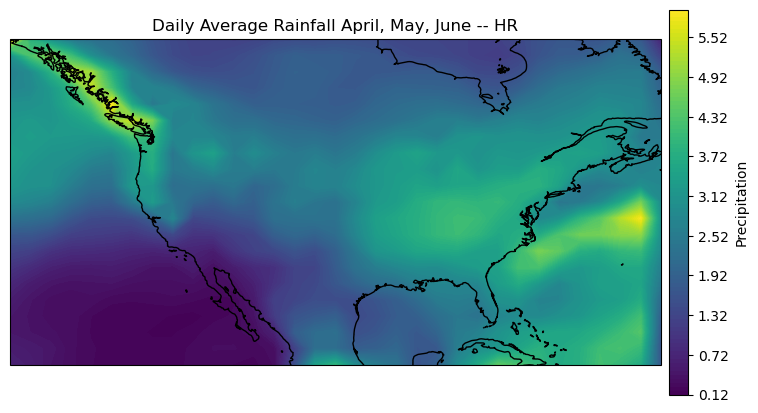

In [32]:
plt.figure()
fig, ax = plt.subplots(figsize=(10, 5), subplot_kw={'projection': ccrs.PlateCarree()})
#ax.set_extent([-160, -40, 10, 80], crs=ccrs.PlateCarree())
contour = ax.contourf(lon_hr, lat_hr, avg_amj_hr, cmap='viridis', transform=ccrs.PlateCarree(), levels=100)
ax.coastlines()
cbar = plt.colorbar(contour, ax=ax, orientation='vertical', pad=0.01)
cbar.set_label('Precipitation (mm)')
plt.title("Daily Average Rainfall April, May, June -- HR")

In [33]:
#Use loop to calculate a three month average -- April, May, and June (amj)
months = [4,5,6]
amj_mmf = []
for year in range(1, 10):  # Adjust based on your data's year range
    for month in months:
        # Filter data for the specific year and month
        monthly_data = precip_mmf_daily.sel(time=(precip_mmf_daily['time.year'] == year) & (precip_mmf_daily['time.month'] == month))
        amj_mmf.append(monthly_data)

combine_amj_mmf = xr.concat(amj_mmf, dim='time')
avg_amj_mmf = np.mean(combine_amj_mmf, axis=0)

Text(0.5, 1.0, 'Daily Average Rainfall April, May, June -- MMF')

<Figure size 640x480 with 0 Axes>

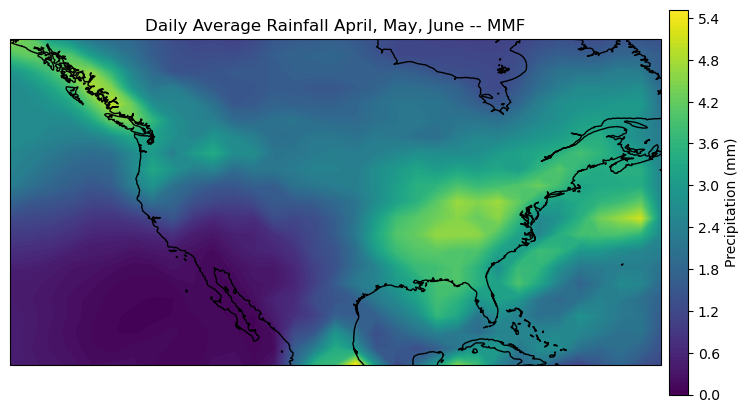

In [34]:
plt.figure()
fig, ax = plt.subplots(figsize=(10, 5), subplot_kw={'projection': ccrs.PlateCarree()})
#ax.set_extent([-160, -40, 10, 80], crs=ccrs.PlateCarree())
contour = ax.contourf(lon_mmf, lat_mmf, avg_amj_mmf, cmap='viridis', transform=ccrs.PlateCarree(), levels=100)
ax.coastlines()
cbar = plt.colorbar(contour, ax=ax, orientation='vertical', pad=0.01)
cbar.set_label('Precipitation (mm)')
plt.title("Daily Average Rainfall April, May, June -- MMF")

In [35]:
#Use loop to calculate a three month average -- April, May, and June (amj)
months = [4,5,6]
amj_cpc = []
for year in range(1958, 1997):  # Adjust based on your data's year range
    for month in months:
        # Filter data for the specific year and month
        monthly_data = precip_cpc_daily.sel(time=(precip_cpc_daily['time.year'] == year) & (precip_cpc_daily['time.month'] == month))
        amj_cpc.append(monthly_data)

combine_amj_cpc = xr.concat(amj_cpc, dim='time')
avg_amj_cpc = np.mean(combine_amj_cpc, axis=0)

Text(0.5, 1.0, 'Daily Average Rainfall April, May, June -- CPC')

<Figure size 640x480 with 0 Axes>

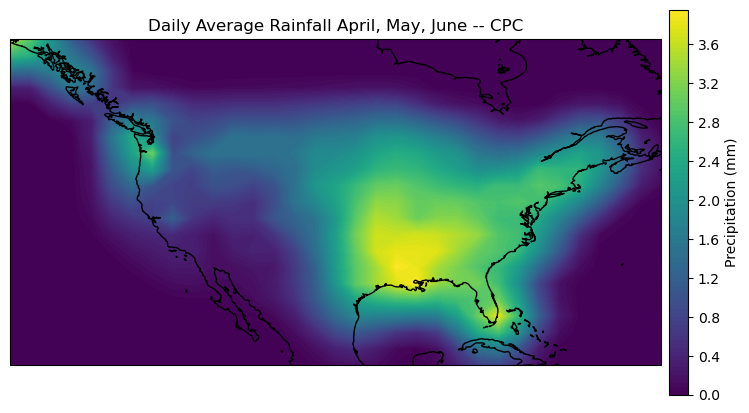

In [36]:
plt.figure()
fig, ax = plt.subplots(figsize=(10, 5), subplot_kw={'projection': ccrs.PlateCarree()})
#ax.set_extent([-160, -40, 10, 80], crs=ccrs.PlateCarree())
contour = ax.contourf(lon_cpc, lat_cpc, avg_amj_cpc, cmap='viridis', transform=ccrs.PlateCarree(), levels=100)
ax.coastlines()
cbar = plt.colorbar(contour, ax=ax, orientation='vertical', pad=0.01)
cbar.set_label('Precipitation (mm)')
plt.title("Daily Average Rainfall April, May, June -- CPC")

In [37]:
#Use loop to calculate a three month average -- April, May, and June (amj)
months = [4,5,6]
amj_img = []
for year in range(2001, 2020):  # Adjust based on your data's year range
    for month in months:
        # Filter data for the specific year and month
        monthly_data = precip_img_daily.sel(time=(precip_img_daily['time.year'] == year) & (precip_img_daily['time.month'] == month))
        amj_img.append(monthly_data)

combine_amj_img = xr.concat(amj_img, dim='time')
avg_amj_img = np.mean(combine_amj_img, axis=0)

Text(0.5, 1.0, 'Daily Average Rainfall April, May, June -- IMERG')

<Figure size 640x480 with 0 Axes>

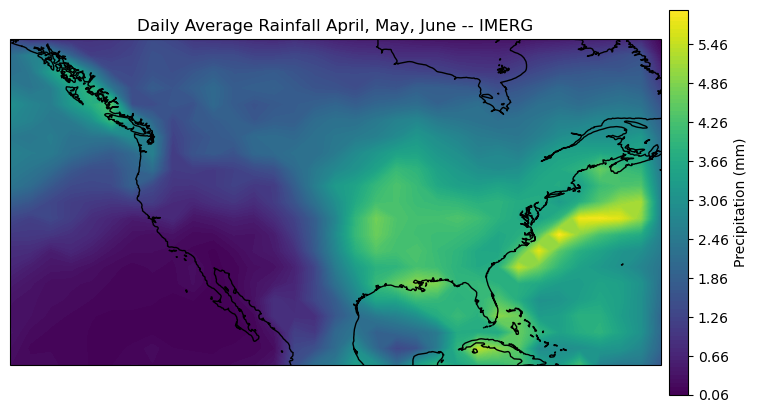

In [38]:
plt.figure()
fig, ax = plt.subplots(figsize=(10, 5), subplot_kw={'projection': ccrs.PlateCarree()})
#ax.set_extent([-160, -40, 10, 80], crs=ccrs.PlateCarree())
contour = ax.contourf(lon_img, lat_img, avg_amj_img, cmap='viridis', transform=ccrs.PlateCarree(), levels=100)
ax.coastlines()
cbar = plt.colorbar(contour, ax=ax, orientation='vertical', pad=0.01)
cbar.set_label('Precipitation (mm)')
plt.title("Daily Average Rainfall April, May, June -- IMERG")

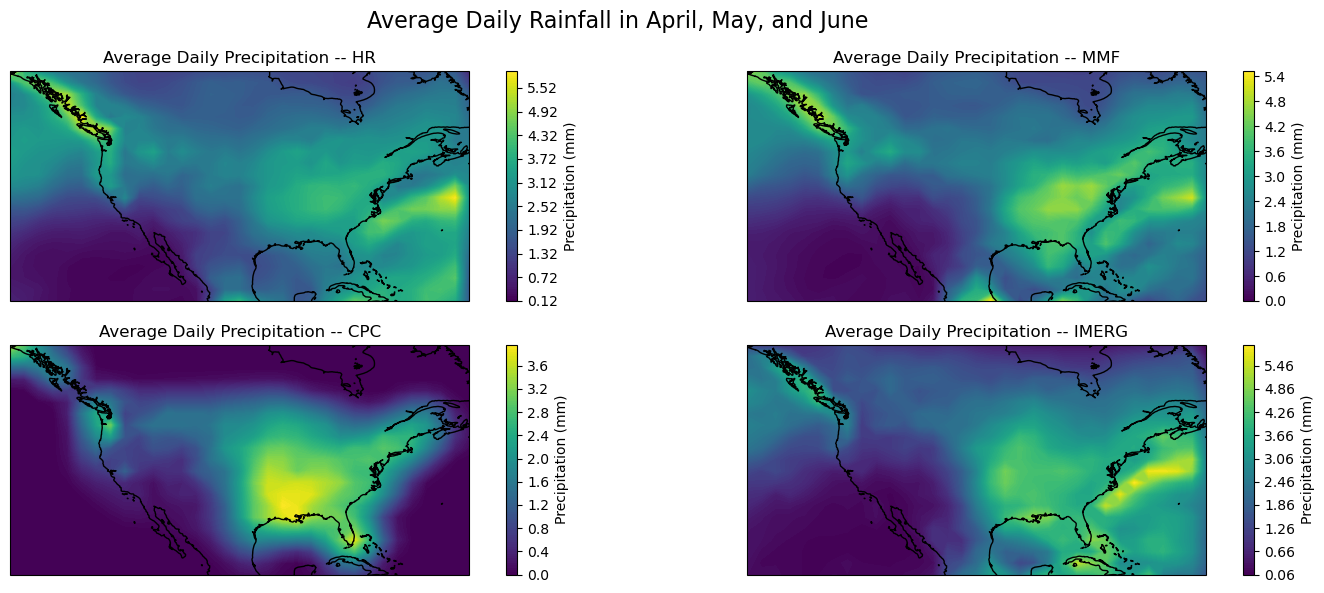

In [39]:
#Plot average rainfall
fig, axs = plt.subplots(2, 2, figsize=(15, 6), subplot_kw={'projection': ccrs.PlateCarree()})

# Plot the average precipitation
c1 = axs[0,0].contourf(lon_hr, lat_hr, avg_amj_hr, cmap='viridis', levels=100)
axs[0,0].coastlines()
axs[0,0].set_title('Average Daily Precipitation -- HR')
plt.colorbar(c1, ax=axs[0,0], label='Precipitation (mm)')

# Plot the 99th percentile precipitation
c2 = axs[0,1].contourf(lon_mmf, lat_mmf, avg_amj_mmf, cmap='viridis', levels=100)
axs[0,1].coastlines()
axs[0,1].set_title('Average Daily Precipitation -- MMF')
plt.colorbar(c2, ax=axs[0,1], label='Precipitation (mm)')

# Plot the 99th percentile precipitation
c3 = axs[1,0].contourf(lon_cpc, lat_cpc, avg_amj_cpc, cmap='viridis', levels=100)
axs[1,0].coastlines()
axs[1,0].set_title('Average Daily Precipitation -- CPC')
plt.colorbar(c3, ax=axs[1,0], label='Precipitation (mm)')

# Plot the 99th percentile precipitation
c4 = axs[1,1].contourf(lon_img, lat_img, avg_amj_img, cmap='viridis', levels=100)
axs[1,1].coastlines()
axs[1,1].set_title('Average Daily Precipitation -- IMERG')
plt.colorbar(c4, ax=axs[1,1], label='Precipitation (mm)')

fig.suptitle('Average Daily Rainfall in April, May, and June', fontsize=16)

# Adjust layout
#plt.subplots_adjust(hspace=0.3, wspace=0.3)
plt.tight_layout()
plt.show()